## Problem 4: Multi-Layer Perceptron Problem Using Keras

The data scientists at one of the retail stores have collected 2019 sales data for different products across various stores in different cities. The data in the file deep_learning_task_dataset.csv consists of 5000 datapoints and consists of both input and output variables, the description of which is given in the table below. Divide the dataset into training (80%) and test (20%). You need to predict the sales for test data set. Table 1: Input and Output Variables for Training Dataset The following tasks need to be performed:

    1 Pre-processing of dataset. 
    2  Define the architecture of your Deep Learning Model. Use the markdown cell to explain the architecture of your model.
    3 Training and testing your model.
    4 Calculate the R2 of your predictions. The closer the value of R2 to 1, the higher points you will score



The question dilicated a regression problem. The key points that represents as a regression problem are:

Objective: The question requested to "predicts the sales" of different products across different stores base on data. The prediction sales includes estimating real-valued quantities for example continous values which is the topic of regression tasks, not classification tasks.

The expected output variables : Our main aim is to determine the sales, which is our target or dependent variable. Sales are inherently continuous, taking any positive numeric value, unlike classification tasks which predict within a confined set of categories.

The expected value of evaluation metric: The R-squared (R2) metric is mentioned as the evaluation standard. R-squared is use in the term of regression problems, it measures the proportion of the variance in the dependent variable tha is predictable from the independent variables.It is statistical that will give information about how good of the model. Typically, a higher R square values indicates that the model fits the data better, explaning a higher propotion of the variance.

With this background, when building and training our model, we need to think 'regression':

- Loss function is fits function for regression, such as "mean_squared_error".
- Since predicting a single continous value, the last layer of neural network should have single neuron and  would use a linear activation function (or no activation function). 
- In regards of evaluation metrics, should be suitable for regression, which means they should measure the difference between the continous values predicted by the model and the actual values, R2 Score of Mean Baseline and R2 Score of Medain Baseline used in this case.

In [24]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns

%matplotlib inline

# Import data

In [25]:
# Load data
data = pd.read_csv('deep_learning_task_dataset.csv')
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [26]:
# Check numbers of rows and columns
print(data.shape)

(5000, 12)


## Preprocessing 
Handling missing values.

In [27]:
# The dataset has missing values in the "Item_Weight" and "Outlet_Size"

print('Before handling missing value: ')
print('')
print(data.isnull().sum())


Before handling missing value: 

Item_Identifier                 0
Item_Weight                   818
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1439
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64


In [28]:
# Handling missing value of "Item_Weight":
value = data['Item_Weight'].mode()[0]
data['Item_Weight'].fillna(value, inplace = True)

# The "Outlet_Size" is categorical data, we will fill with the mode(Most frrequent value)
mode_value = data['Outlet_Size'].mode()[0] 
data['Outlet_Size'].fillna(mode_value, inplace = True)

print('')
print('After handling missing value: ')
print('')
print(data.isnull().sum())


After handling missing value: 

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64


In [29]:
# Inspects rows with Nan values.
data.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [30]:
# showing the number of zeros in each column

zero = (data == 0).sum()
zero

Item_Identifier                0
Item_Weight                    0
Item_Fat_Content               0
Item_Visibility              305
Item_Type                      0
Item_MRP                       0
Outlet_Identifier              0
Outlet_Establishment_Year      0
Outlet_Size                    0
Outlet_Location_Type           0
Outlet_Type                    0
Item_Outlet_Sales              0
dtype: int64

Text(0, 0.5, 'Frequency')

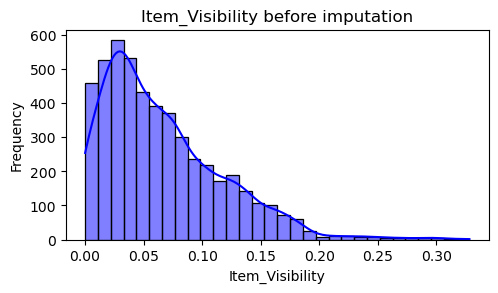

In [31]:
# Before Median Imputation of 'Item_Visibility'

plt.figure(figsize=(12, 6))

# Plot for 'Item_Visibility' before imputation
plt.subplot(2, 2, 1)
sns.histplot(data['Item_Visibility'], kde=True, color='blue', bins=30)
plt.title('Item_Visibility before imputation')
plt.xlabel('Item_Visibility')
plt.ylabel('Frequency')

In [34]:
# Changes 0 to NaNs and then fill NaNs with the median value. It use the median of non zero values,avoid the bai that zeros values might occurs.

# Replace 0 with NaNs in "Item_Visibilty"

data['Item_Visibility'] = data['Item_Visibility'].replace(0, np.nan)

#Calculate the median
median_visibility = data['Item_Visibility'].median()

#Fill NaNs with the median values
data['Item_Visibility'].fillna(median_visibility, inplace=True)

# Recheck again after converted to Median

zero = (data == 0).sum()
zero


Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

Text(0, 0.5, 'Frequency')

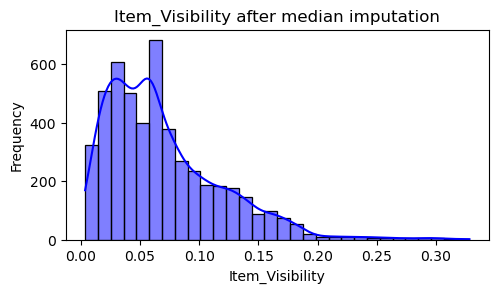

In [35]:
# After Median Imputation of 'Item_Visibility'

plt.figure(figsize=(12, 6))

# Plot for 'Item_Visibility' after imputation
plt.subplot(2, 2, 1)
sns.histplot(data['Item_Visibility'], kde=True, color='blue', bins=30)
plt.title('Item_Visibility after median imputation')
plt.xlabel('Item_Visibility')
plt.ylabel('Frequency')

From the distribution after Median imputataion, 'Item_Visibility' indicates the percentage of total display area allocated to specific products in a store. Median imputation on such a variable has introduced a noticeable spike in its distribution, highlighting where 0 values were replaced. This changes can impacts the data statistical. However, maintaining the '0' values in 'Item_Visibility' might be essential, as it could suggest products not displayed on physical shelves, possibly hinting at online-only sales. However, while retainng 0 might suggest the better approach in this case (R2 Score: 0.6046688813508325), as the table does not directly mention online sales. Given the circumstances, I have decided to go with median imputation.

#### Exmaple of R socre if mantain 0 in ''Item_Visibility''
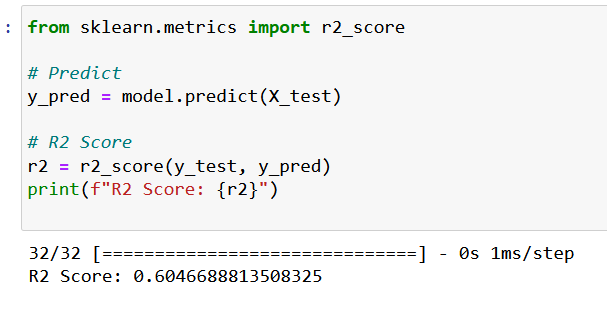

In [36]:
# Check  total columns in dataset.
print(data.columns)

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')


In [37]:
# Convert categorical variables into dummy/indicator variables
data = pd.get_dummies(data, columns=['Item_Fat_Content', 'Item_Type', 'Outlet_Size', 
               'Outlet_Location_Type', 'Outlet_Type'], drop_first=True)

In [38]:
# Check  total columns in dataset again after convert categorical variables into binary form.

print(data.columns)
print(data.shape)

Index(['Item_Identifier', 'Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Identifier', 'Outlet_Establishment_Year', 'Item_Outlet_Sales',
       'Item_Fat_Content_Low Fat', 'Item_Fat_Content_Regular',
       'Item_Fat_Content_low fat', 'Item_Fat_Content_reg', 'Item_Type_Breads',
       'Item_Type_Breakfast', 'Item_Type_Canned', 'Item_Type_Dairy',
       'Item_Type_Frozen Foods', 'Item_Type_Fruits and Vegetables',
       'Item_Type_Hard Drinks', 'Item_Type_Health and Hygiene',
       'Item_Type_Household', 'Item_Type_Meat', 'Item_Type_Others',
       'Item_Type_Seafood', 'Item_Type_Snack Foods', 'Item_Type_Soft Drinks',
       'Item_Type_Starchy Foods', 'Outlet_Size_Medium', 'Outlet_Size_Small',
       'Outlet_Location_Type_Tier 2', 'Outlet_Location_Type_Tier 3',
       'Outlet_Type_Supermarket Type1', 'Outlet_Type_Supermarket Type2',
       'Outlet_Type_Supermarket Type3'],
      dtype='object')
(5000, 33)


Note : Usually numerical ones, and not categorical ones (especially not after one-hot encoding), include:

Preserving Information: Scaling is meaningful when applied to quantities where the numerical values and differences between them are meaningful. For numerical columns like 'Item_Weight' or 'Item_MRP', the values represent actual measurements or counts, and their differences are significant. Scaling these brings them to the same range without losing information.

Irrelevance for Categorical Data: After one-hot encoding categorical data, you have a binary representation. Scaling binary flags (0s and 1s from one-hot encoding) isn't practically useful and can be less interpretable, as the notion of distance doesn't apply the same way. For example, having values of 0 and 1 specifies the absence or presence of a feature. If you standardize this, you could end up with values that are difficult to interpret logically (like a feature being "-1" present).

Algorithm Requirements: Many machine learning algorithms require or perform better with scaled features because they compute distances between data points for modeling. Features on larger numeric scales can unduly influence the model (think of how a "price" feature in the thousands might dominate a "quantity" feature ranging from 1 to 10). However, algorithms that work with binary flags (like trees-based algorithms) do not require feature scaling.

Avoiding Data Leakage: When apply scaling, we are using some aggregate information from data (like the mean or standard deviation of a feature). If we scale  whole dataset and then split into training/testing, we're leaking information from test set into  training process. That's why we fit  scaler on the training data and use that scaler to transform our test data, avoiding this kind of data leakage.

## Normalization

In [39]:
# The reason you typically scale only specific columns, usually numerical ones, and not categorical ones (especially not after one-hot encoding), include:

# Normalization
scaler = StandardScaler()
scaled_columns = ['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Outlet_Establishment_Year']  


data[scaled_columns] = scaler.fit_transform(data[scaled_columns])

##  Split dataset into features and target variables.

In [40]:
# Split dataset into features and target variables

X = data.drop(['Item_Outlet_Sales', 'Item_Identifier', 'Outlet_Identifier'], axis=1)  # predictors/features
y = data['Item_Outlet_Sales']  # target variable

In [41]:
# Split dataset into traning set and test set
# Split dataset into training set and test set

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)  # 80% training and 20% test

In [42]:
# Convert pandas dataframes to numpy arrays before feeding them into the neural model.

# X_train = X_train.to_numpy().astype('float32')
# y_train = y_train.to_numpy().astype('float32')
# X_test = X_test.to_numpy().astype('float32')
# y_test = y_test.to_numpy().astype('float32')


## Model Architecture

In [43]:
# Building a Neutrla network

# Note: input(data recieved by input layer, and features are detected) -> hidden(analyze and process the input features) -> output layers(Final results).
# Note: As more hidden layers are added to the network, the model's capacity to analyze  complex patterns also improve.

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, InputLayer

from tensorflow.keras.metrics import RootMeanSquaredError

# Define model
model = Sequential()

input_neurons = X_train.shape[1]

model.add(InputLayer(input_shape=input_neurons,))
model.add(Dense(64, activation='relu')) #standard layer
model.add(Dense(32, activation='relu')) 

model.add(Dense(1, activation='linear'))  # no activation in the output layer for regression


# Compile model

model.compile(loss='mean_squared_error', optimizer='Adam', metrics=[RootMeanSquaredError()]) #custom RMSE metric


# Note for self understanding:
# 1 Keras = interconnected dcision functions, know as "nodes", which interact with each other through axon like edge.
# 2 "Node" = seperated into "layers" and consists of wide base. 
# 3 "first Layers" = consists "raw input data" like numeric values, text, image pixels or sounds.
# 4 "divided to several nodes" = each input nodes then send information to the next layer of nods va the networks wdge.
# 5 "Activation edges" : 
# if a sum of the connected edge sastifies a set threshold, know as activation function This activate the neuron at the next layer.
# If the sum of the connceted edges does not meet the set thereshold, the activation fails, which results all nothing element.
# the weigh assigns to each edge are different, preventing them to product the same solution.

In [44]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 64)                1984      
                                                                 
 dense_4 (Dense)             (None, 32)                2080      
                                                                 
 dense_5 (Dense)             (None, 1)                 33        
                                                                 
Total params: 4097 (16.00 KB)
Trainable params: 4097 (16.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [45]:
# Train model
history = model.fit(X_train, y_train, epochs=150, batch_size=10, validation_data=(X_test, y_test))  # you can adjust epochs and batch_size

# Evaluate the model
scores = model.evaluate(X_test, y_test)
print(f"Test loss: {scores}")


Epoch 1/150
400/400 [==============================] - 1s 2ms/step - loss: 5968200.5000 - root_mean_squared_error: 2442.9900 - val_loss: 2966878.7500 - val_root_mean_squared_error: 1722.4630
Epoch 2/150
400/400 [==============================] - 1s 2ms/step - loss: 1906319.0000 - root_mean_squared_error: 1380.6951 - val_loss: 1935093.3750 - val_root_mean_squared_error: 1391.0763
Epoch 3/150
400/400 [==============================] - 1s 2ms/step - loss: 1628336.5000 - root_mean_squared_error: 1276.0629 - val_loss: 1796194.2500 - val_root_mean_squared_error: 1340.2217
Epoch 4/150
400/400 [==============================] - 1s 2ms/step - loss: 1549470.1250 - root_mean_squared_error: 1244.7771 - val_loss: 1737401.0000 - val_root_mean_squared_error: 1318.1050
Epoch 5/150
400/400 [==============================] - 1s 2ms/step - loss: 1508757.8750 - root_mean_squared_error: 1228.3151 - val_loss: 1695232.5000 - val_root_mean_squared_error: 1302.0110
Epoch 6/150
400/400 [========================

Epoch 44/150
400/400 [==============================] - 1s 2ms/step - loss: 1153326.6250 - root_mean_squared_error: 1073.9305 - val_loss: 1299126.0000 - val_root_mean_squared_error: 1139.7921
Epoch 45/150
400/400 [==============================] - 1s 2ms/step - loss: 1152226.3750 - root_mean_squared_error: 1073.4181 - val_loss: 1309631.8750 - val_root_mean_squared_error: 1144.3915
Epoch 46/150
400/400 [==============================] - 1s 2ms/step - loss: 1154160.1250 - root_mean_squared_error: 1074.3185 - val_loss: 1297856.1250 - val_root_mean_squared_error: 1139.2349
Epoch 47/150
400/400 [==============================] - 1s 2ms/step - loss: 1152682.2500 - root_mean_squared_error: 1073.6304 - val_loss: 1298306.7500 - val_root_mean_squared_error: 1139.4326
Epoch 48/150
400/400 [==============================] - 1s 2ms/step - loss: 1152060.3750 - root_mean_squared_error: 1073.3407 - val_loss: 1312021.3750 - val_root_mean_squared_error: 1145.4351
Epoch 49/150
400/400 [==================

Epoch 87/150
400/400 [==============================] - 1s 2ms/step - loss: 1128310.7500 - root_mean_squared_error: 1062.2197 - val_loss: 1276271.8750 - val_root_mean_squared_error: 1129.7220
Epoch 88/150
400/400 [==============================] - 1s 2ms/step - loss: 1126487.2500 - root_mean_squared_error: 1061.3611 - val_loss: 1286053.2500 - val_root_mean_squared_error: 1134.0428
Epoch 89/150
400/400 [==============================] - 1s 2ms/step - loss: 1128187.1250 - root_mean_squared_error: 1062.1615 - val_loss: 1284110.2500 - val_root_mean_squared_error: 1133.1859
Epoch 90/150
400/400 [==============================] - 1s 2ms/step - loss: 1127514.8750 - root_mean_squared_error: 1061.8451 - val_loss: 1281082.7500 - val_root_mean_squared_error: 1131.8492
Epoch 91/150
400/400 [==============================] - 1s 2ms/step - loss: 1123048.3750 - root_mean_squared_error: 1059.7397 - val_loss: 1290153.8750 - val_root_mean_squared_error: 1135.8494
Epoch 92/150
400/400 [==================

In [46]:
from sklearn.metrics import r2_score

# Predict
y_pred = model.predict(X_test)

# R2 Score
r2 = r2_score(y_test, y_pred)
print(f"R2 Score: {r2}")


32/32 [==============================] - 0s 1ms/step
R2 Score: 0.5997205514294013


In [47]:
# Predict the mean of the training data for all instances in the test set
y_train_mean = y_train.mean()
y_pred_baseline = [y_train_mean] * len(y_test)

# Calculate the R2 score for the baseline
r2_baseline = r2_score(y_test, y_pred_baseline)
print(f"R2 Score of Mean Baseline: {r2_baseline}")


R2 Score of Mean Baseline: -0.0014913393888729143


Mean Baseline Model:

R2 Score: -0.00149
This model predicts the mean sales value from the training set for all test instances.
An R2 score close to 0 indicates that the model is no better than a horizontal line.

In [48]:
import numpy as np

# Predict the median of the training data for all instances in the test set
y_train_median = np.median(y_train)
y_pred_baseline_median = [y_train_median] * len(y_test)

# Calculate the R2 score for the baseline
r2_baseline_median = r2_score(y_test, y_pred_baseline_median)
print(f"R2 Score of Median Baseline: {r2_baseline_median}")


R2 Score of Median Baseline: -0.059552699738150805


Median baseline model: 

R2 Score: -0.05955
This model predicts the median sales value from the training set for all test instances.
Again, a score close to 0 or negative indicates that the model doesn't capture the variance in the test data.

## Conclusion :

Propotion of total variation of outcomes explained by the model. The value of R2 ranges between 0 and 1.

From the model : R2 Score: 0.59. This indicates that approximately 0.59% of variability in the dependent variable(Slaes in this case) is explained by the model. In the context of predicting sales for a retail store using a Multi-Layer Perception, an R2 score 0f 0.598 is decent. However in real world problem. R2 score of 0.598 might be considered insufficient.


In summary, R2 score of 0.59 indicates the model has learned some patterns from the data, The negative R2 scores of the baseline models show that they are performing worse than a model that would predict just the mean, reinforcing the fact that Keres is indeed learning meaningful patterns from the data. 